In [ ]:
## Capstone ML Project for Machine Learning Course - IBM Data Science Professional Certification

In [2]:
## Instructions
## Now that you have been equipped with the skills to use different Machine Learning algorithms, over the course of five weeks, you will have the opportunity to practice and apply it on a dataset. In this project, you will complete a notebook where you will build a classifier to predict whether a loan case will be paid off or not.
## You load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:
## k-Nearest Neighbour
## Decision Tree
## Support Vector Machine
## Logistic Regression
## The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:
## Jaccard index
## F1-score
## LogLoass

Import all the libraries needed for this project

In [3]:
# Define all the includes - these libraries are needed for the project
import pandas as pd # basic library for python programming
import numpy as np # basic library for python programming
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing # needed for all ML APIs and K-Means Clustering to cluster data
%matplotlib inline
import itertools

# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y
import seaborn as sns

Load the loan data set

In [4]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-01-10 22:47:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2021-01-10 22:47:57 (1.25 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [5]:
import sys
print(sys.version)

3.6.12 | packaged by conda-forge | (default, Dec  9 2020, 00:36:02) 
[GCC 9.3.0]


The data set is in csv format and this needs to be moved to a data frame which can be used for all experiments. 

In [6]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [7]:
# Find the data dimension
df.shape

(346, 10)

This shows we have a table of data with 346 rows and 10 columns

In [8]:
# The current date format in the data sheet has mm/dd/yyyy. It is helpful to convert this data format into YYYY-MM-DD instead of a / delimiter. 
# This cleanup step is not needed if the / can be used as a limiter. 
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


Now that the data set is available, we need to perform Data Wrangling and prepare the data frame for visualization. 

In [9]:
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [10]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

Please note that the load status could be PAIDOFF and COLLECTION which means it has gone into collection. The below data visualization code is not needed for the project. It only helps to understand the data set better. Before we can get into actual ML algorithm calls, we can understand the data set. 

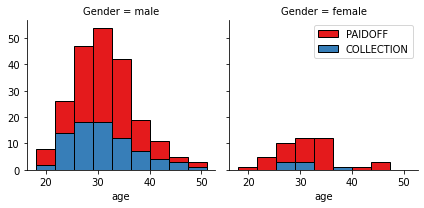

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)

# Common code to plot the data for all bins formation 
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

This data chart shows people who are aged were responsible in repaying the loan irrespective of the gender. It is mostly customers who are young that have defaulted. 

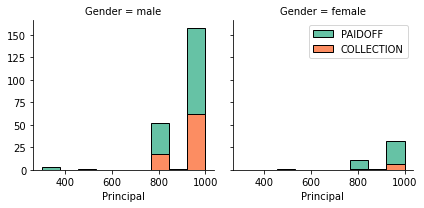

In [12]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)

# Common code to plot the data for all bins formation 
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

With the map comparing the geneder alone, we can see those who had more principal paid off the same. There is a pattern to the cases where collection status came up. 

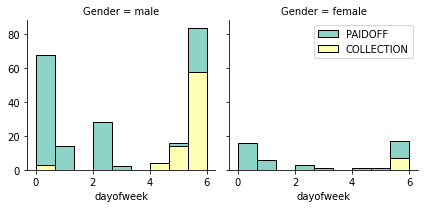

In [13]:
# Get the data for day of the week based 
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)

# Common code to plot the data for all bins formation 
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set3", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k") # mainly row name is specified here otherwise the command is common for plotting 
g.axes[-1].legend()
plt.show()

Clearly the later part of the week whenever the loan was taken, that went into collection. Although we cannot conclude and take any action item to 
stop giving loan during later part of week. There are other strings to be considered and this is just a pattern. 

In [14]:
# Lets see how many out of the total data set actually went into collection as this data is very important for prediction purpose
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

This means almost one third of the data is representing cases where the loan went into collection. This gives us good test set too for other experiments. 
The day of the week based data shows 

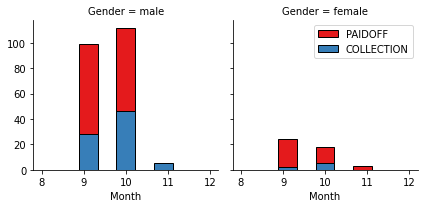

In [15]:
df['Month'] = df.due_date.dt.month
bins = np.linspace(df.Month.min()-1, df.Month.max()+1, 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

    The above map shows people seem to be paying off loan in 9,10,11 months on an average. Also male gender go into collection for the same months 

In [16]:
df.shape

(346, 12)

In [17]:
# We have now added the dayofweek and Month data to the data table
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,10
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,10
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,9
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,10
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,10


In [18]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10


In [19]:
# Given the fact that the more closer to the weekend the loan goes into collection, lets include the weekend metric also to the table
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1


In [20]:
df['Under30age'] = (df['age'].apply(lambda x: 1 if (x<30)  else 0) & df['loan_status'].apply(lambda x: 1 if (x=='COLLECTION')  else 0))
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend,Under30age
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1,0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,0,6,9,1,0
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,0,6,10,1,1
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,0,0,9,0,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,0,0,11,0,1


In [21]:
# Lets see how many out of the total data set actually went into collection as this data is very important for prediction purpose
df['Under30age'].value_counts()
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
0       PAIDOFF        0.731293
        COLLECTION     0.268707
1       PAIDOFF        0.865385
        COLLECTION     0.134615
Name: loan_status, dtype: float64

What the above data shows is that out of total 86 customers who went into COLLECTION, 43 are of age below 30. This means age alone is not a good factor to bucketize the behaviour. Please recollect that for Machine Learning we need to convert the string based data in the table to numerical data. In this data set, mainly the loan status as PAID/COLLECTION needs to be converted to numerical data for applying ML models later on. Similarly the gender data is in string as male and female. Hence the table needs to be normalized numerically before ML Models can be applied. a

In [22]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend,Under30age
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1,0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1,0


In [23]:
# Convert load status as PAIDOFF and COLLECTION to 0 and 1
#df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
#df.head()

In [24]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

Now that we have so much of data views, it is important to apply one hot encoding to make sure the noise in the data set is removed before we apply ML Models.
    Otherwise the accuracy of the prediction coming from the ML models will be skewed.

In [25]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [26]:
# Not after this we will have a data frame which has only numerical values without specific string label
myFeatureset = df[['Principal','terms','age','Gender','weekend']]
myFeatureset = pd.concat([myFeatureset,pd.get_dummies(df['education'])], axis=1)
myFeatureset.drop(['Master or Above'], axis = 1,inplace=True)
myFeatureset.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [27]:
X = myFeatureset
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [28]:

y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

Before applying the ML algorithms we need to now standardize the data as below and get the train/test set ready before the step.

In [29]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [30]:
X

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

In [31]:
y

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

In [32]:
#Train-Test Split need to be done as preparation for ML model algorithms especially Decision tree generation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# K Nearest Neighbor(KNN)

In [33]:
#Training using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMtx=[];
for n in range(1,Ks):
    knnneigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = knnneigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.68571429, 0.64285714, 0.72857143, 0.72857143, 0.75714286,
       0.78571429, 0.74285714, 0.77142857, 0.75714286, 0.8       ,
       0.74285714])

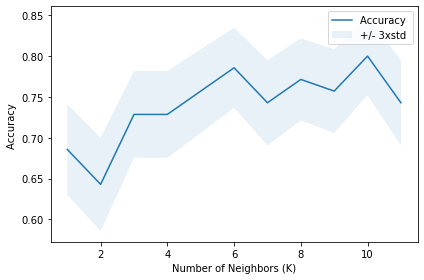

The best accuracy was with 0.8 with k value = 10


In [34]:
# Now that the model is trained, lets plot and see the best accuracy data is obtained with which k
plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k value =", mean_acc.argmax()+1) 
knnneigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train, y_train)

In [35]:
print('Shape of X training set{}'.format(X_train.shape),'&',' Size of Y training set{}'.format(y_train.shape))
print('Shape of X test set{}'.format(X_test.shape),'&',' Size of Y test set{}'.format(y_test.shape))

Shape of X training set(276, 8) &  Size of Y training set(276,)
Shape of X test set(70, 8) &  Size of Y test set(70,)


# DECISION TREE MODELLING AND PREDICTION

The above shows the training set is 276 records while the test set is 70.

Decision Tree: 
   Given the data set which is standardized, we should be able to identify the decision tree classifiers and predict. 
   Below code does the modelling and prediction for the decision tree.

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree

#Modelling
modeltree = DecisionTreeClassifier(criterion="entropy")
modeltree.fit(X_train, y_train)

#Prediction
predTree = modeltree.predict(X_test)
print(predTree[0:5])
print(y_test[0:5])

names = myFeatureset.columns

['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION']


# DECISION TREE ACCURACY

Why we choose entropy in decision tree analysis?. Entropy helps to measure a loss  of information which can introduce uncertainty. In other words entropy represents Information Gain. The greater the reduction in entropy, more data can be derived about Y from X in the decision tree. 

Please note in the above output, 0 means PAIFOFF and 1 means COLLECTION. The matrix is actually like....
[PAIDOFF PAIDOFF PAIDOFF COLLECTION PAIDOFF]
[PAIDOFF COLLECTION COLLECTION COLLECTION PAIDOFF]

In [37]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend,Under30age
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1,0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1,0


In [38]:
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

dot_data = StringIO()
filename = "mydecisiontree.png"
featureNames = myFeatureset.columns
out=tree.export_graphviz(modeltree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  

Next step after modelling and prediction is to measure the decision tree accuracy. Accuracy classification score
computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
In multi label classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0. In this case the accuracy could be better but for the given y test set this is the accuracy that we are expect. 

# VISUALIZATION

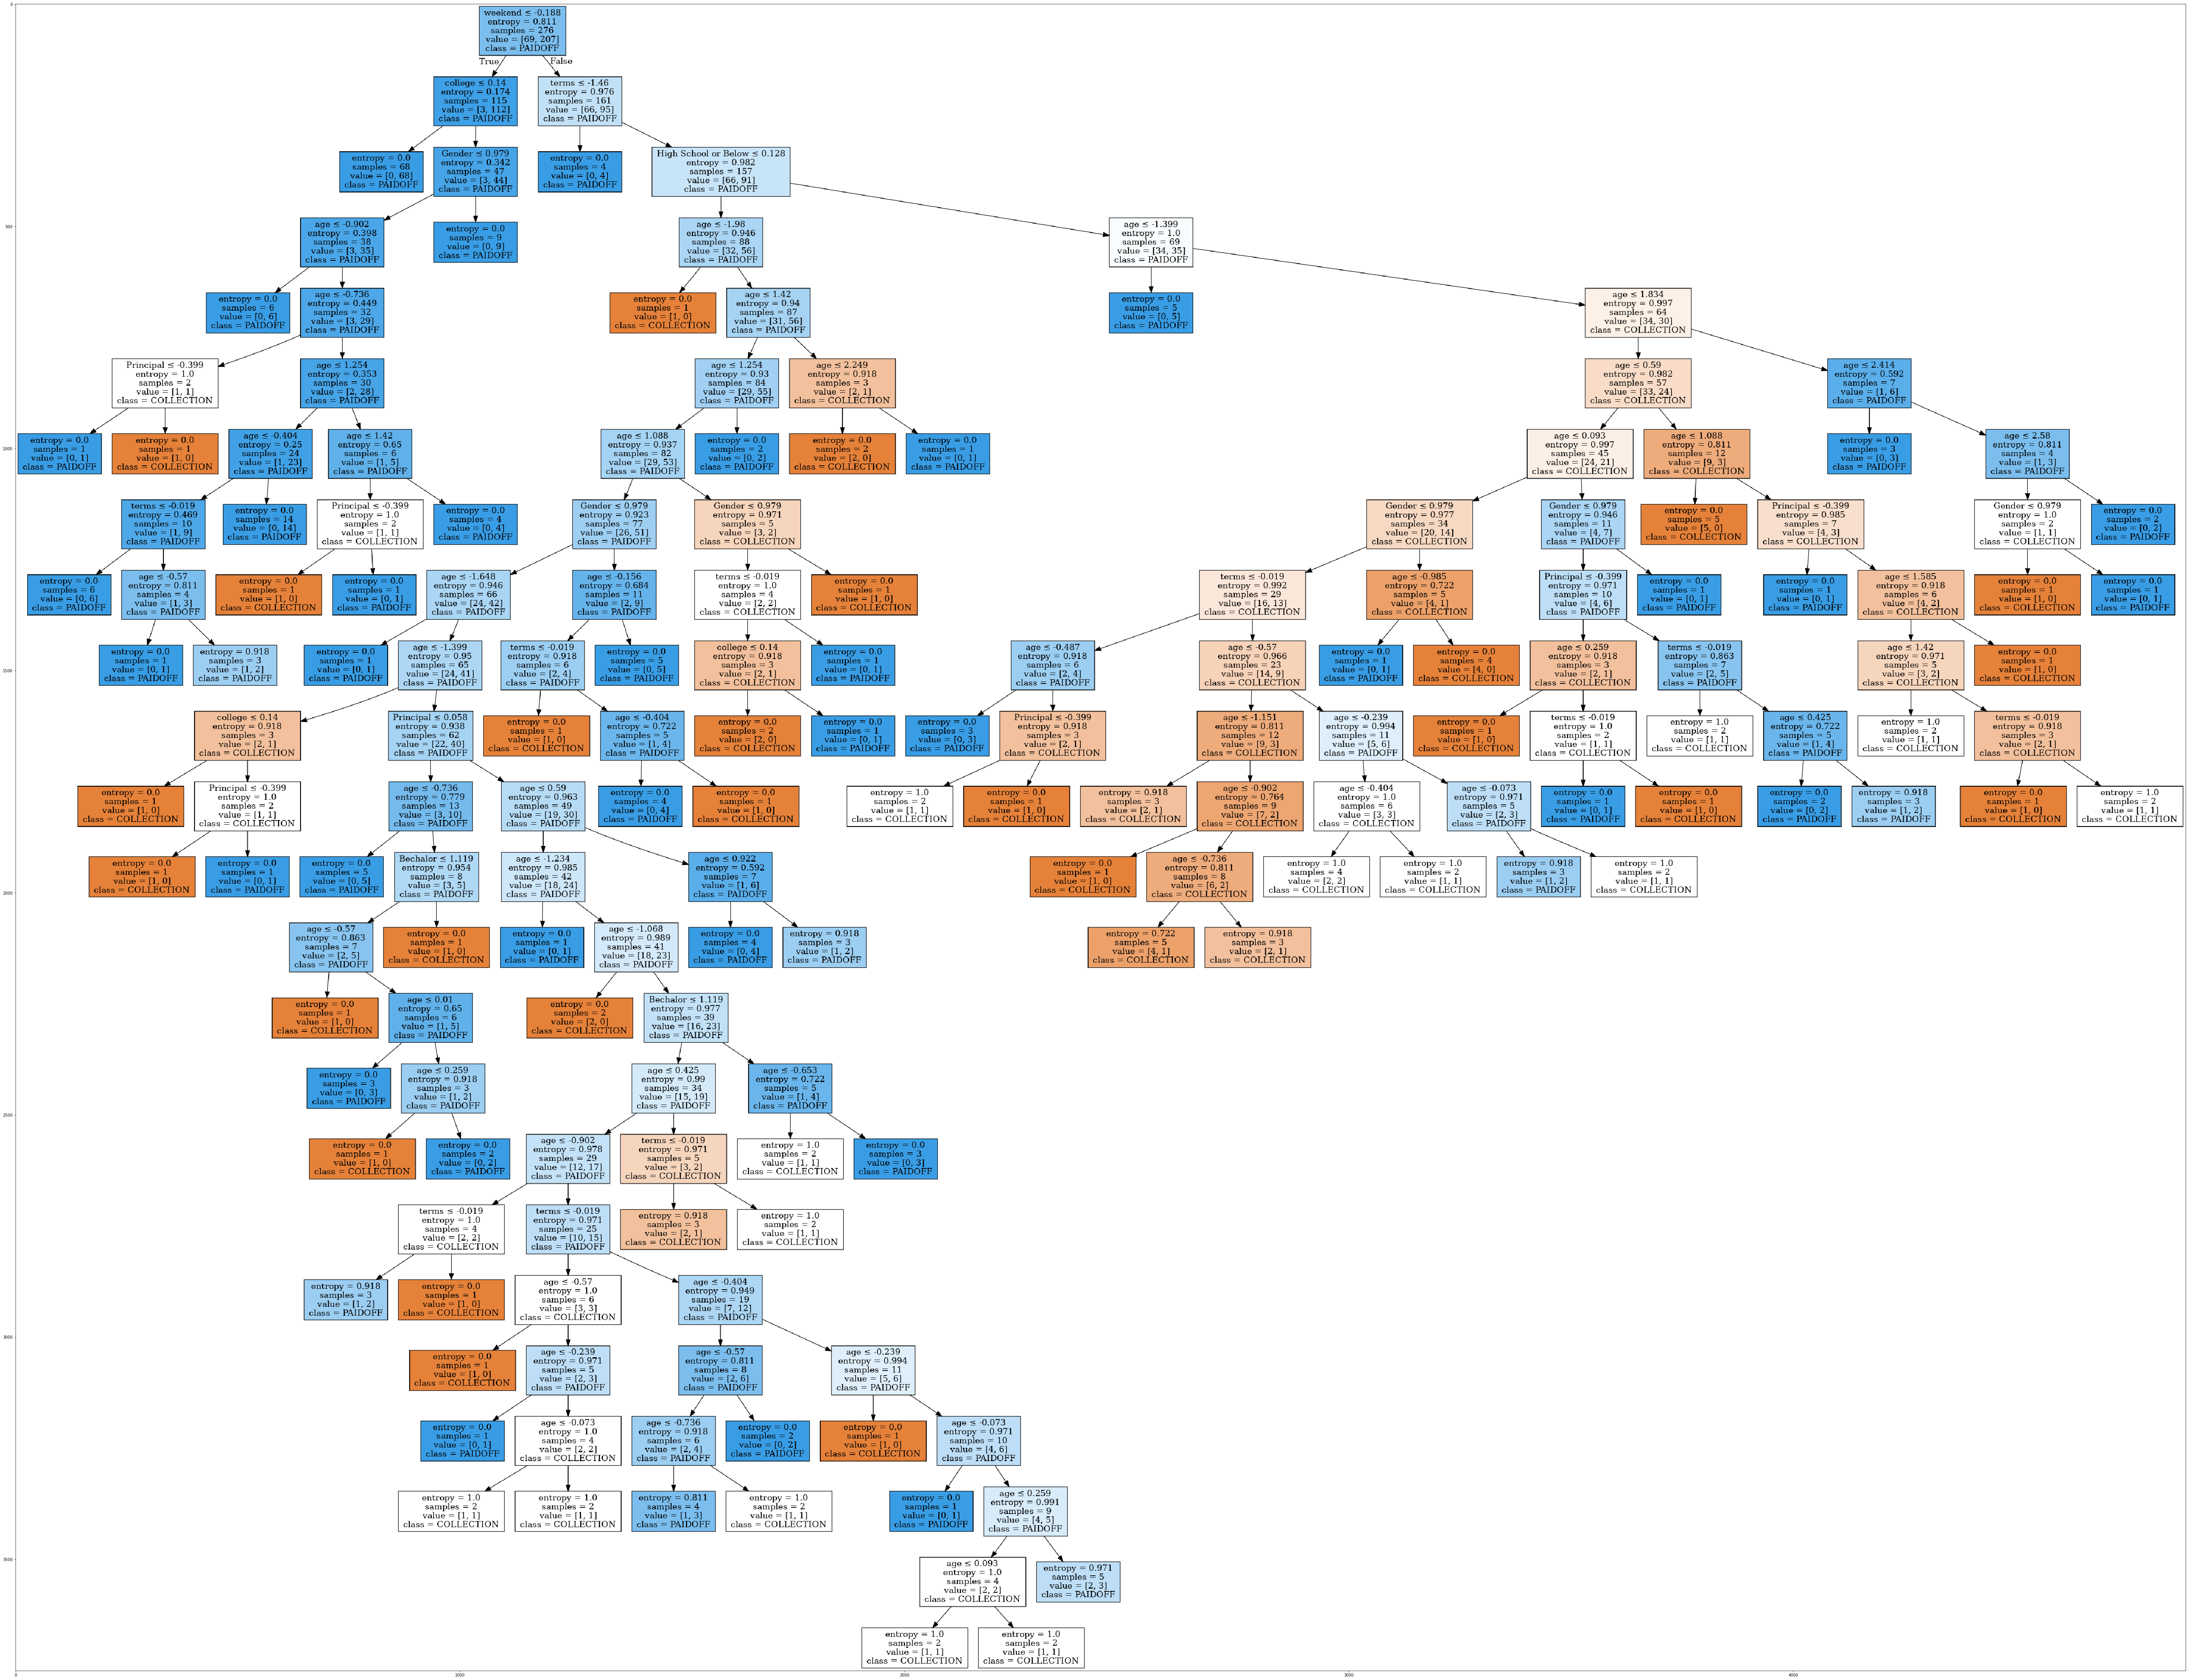

In [39]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [40]:
!python --version

Python 3.6.12


Given the decision tree score card, lets visualize the tree that got formed. We should be able to see the hierarchies in the decision tree nicely below. 

# SVM - Support Vector Machine 

Lets model, predict and evalute using Support Vector Machine.

In [41]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm # Main library to import for Support Vector Machine classification algorithm

# Follow the standard steps of model, predict and evaluate (MPE)
#Modelling the training set
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train, y_train)
#Predict the outcome of the model
yhat = clf.predict(X_test)
#Evaluation of the prediction
from sklearn.metrics import f1_score
f1_score(y_test,yhat, average="weighted")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6309523809523809

Support Vector Machine, or SVM, is a classifier to train the model to understand patterns within the data that might show, customers who payoff or get into collection.

# LOGIC REGRESSION

lets model, predict and evaluate the data set that we have using logic regression.

In [42]:
#Modelling
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train)
#Predict
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
#Evaluation
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat)

0.7571428571428571

Now that we have classified using multiple techniques like KNN, Decision Tree, SVM and Logic Regression, lets evaluate the model. 
Next step is to get the jaccard_similarity_score, f1_core, log_loss metrics. In order to derive these metrics, we need to first 
start working with the test set instead of the train set. We had 271 rows in train set and around 80 in test set. 


In [43]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [44]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-01-10 22:48:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-01-10 22:48:43 (7.96 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [45]:
# Convert the csv data format into a python data frame so that we can execute python commands on top of the data frame easily
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


Just like we did to the train set, convert the date format, identify the weekday, weekend, month columns including education levels. Once we have the data frame ready with these preparedness, we can normalize the test set data. 

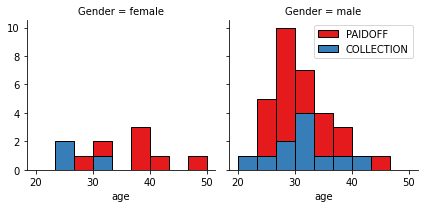

In [46]:
bins = np.linspace(test_df.age.min(), test_df.age.max(), 10)
# Common code to plot the data for all bins formation 
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

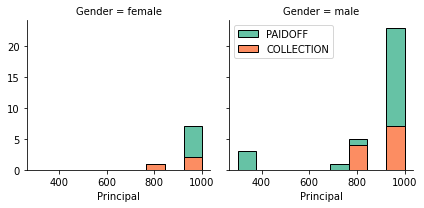

In [47]:
bins = np.linspace(test_df.Principal.min(), test_df.Principal.max(), 10)
# Common code to plot the data for all bins formation 
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [48]:
# Lets see how many out of the total data set actually went into collection as this data is very important for prediction purpose
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

 We have 14 customers loan which went for collection. Ratio wise this seems to be in line with the train set where one third of train set went for collection too. 

In [49]:
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [50]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,1
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,0
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,1
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,0
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,0


In [51]:
# convert date time
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
# evaulate weekend field
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
# work out education level
test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)
test_feature.head()
# normalize the test data
test_X = preprocessing.StandardScaler().fit(test_feature).transform(test_feature)
test_X[0:5]
# and target result
test_y = test_df['loan_status'].values
test_y[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  del sys.path[0]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [52]:
knn_pred=knnneigh.predict(X_test)
jc1=jaccard_similarity_score(y_test, knn_pred)
fs1=f1_score(y_test, knn_pred, average='weighted')

In [53]:
fs1

0.7839285714285714

In [54]:
tree_pred=modeltree.predict(X_test)
jc2=jaccard_similarity_score(y_test, tree_pred)
fs2=f1_score(y_test, tree_pred, average='weighted')
fs2

0.6914224664224665

In [55]:
svm_pred=clf.predict(X_test)
jc3=jaccard_similarity_score(y_test, svm_pred)
fs3=f1_score(y_test, svm_pred, average='weighted')
fs3

0.6309523809523809

In [56]:
log_pred=LR.predict(X_test)
proba=LR.predict_proba(X_test)
jc4=jaccard_similarity_score(y_test, log_pred)
fs4=f1_score(y_test, log_pred, average='weighted')  
ll4=log_loss(y_test, proba)
list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]

In [57]:
import pandas as pd

# fomulate the report format
mydf = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
mydf.columns = ['Jaccard']
mydf.insert(loc=1, column='F1-score', value=list_fs)
mydf.insert(loc=2, column='LogLoss', value=list_ll)
mydf.columns.name = 'Algorithm'
mydf

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.800000,0.783929,NA
Decision Tree,0.685714,0.691422,NA
SVM,0.714286,0.630952,NA
Logistic Regression,0.757143,0.676331,0.561017


# The above graphs and data table show the distribution of test data set.

# Although the data is showed here in decimals, it can be read in terms of % too. For example, Jaccard KNN value is 0.80 * 100 = 80%. The F1-score is at 78.3%.
# The Decision Tree is consistent at 68.5% and 69%. SVM is at 71% and 63%. 

# Jaccard Similarity Index: As far as Jaccard similarity index is considered to compare the training and test set for similar and distinct data. 
# The more the %, it means both the data set is having similar characteristics. 

# F1-Score: A perfect F1-Score is when it is closer or equal to 1. The model is accurate if the score is closer to 1 and is inaccurate if it is closer to 0. 
# The F-score is a way of combining the precision and rejection of the model, and it is defined as the harmonic mean of the model's precision and rejection.

# How to improve the accuracy of these accuracy index?
# 1. By increasing the data set for both training and test set
# 2. By idenfifying the correct classified feature set. The current feature sets used are limited few columns in the data table. 
# 3. Use more suitable classification algorithm 
# 4. Over-sample the test set, and/or under-sample the training set to reduce the data set imbalance.
# 5. Use higher weights for the training data set, although over sampling for the test set could be more effective based on the data set and feature selection.